🧭 Week 3 — Exploratory Data Analysis (EDA)
🎯 Objectives

Load and understand the dataset

Perform Univariate Analysis (single column insights)

Perform Bivariate Analysis (relationships between columns)

Visualize trends and distributions

Interpret insights

In [3]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Step 2: Load the processed file
df = pd.read_parquet("processed/delayedflights_2008_processed.parquet")

# Quick check
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("Columns list:", df.columns.tolist())

# Display a few rows
df.head()


Rows: 1936758
Columns: 44
Columns list: ['unnamed:_0', 'year', 'month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime', 'crsarrtime', 'uniquecarrier', 'flightnum', 'tailnum', 'actualelapsedtime', 'crselapsedtime', 'airtime', 'arrdelay', 'depdelay', 'origin', 'dest', 'distance', 'taxiin', 'taxiout', 'cancelled', 'cancellationcode', 'diverted', 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay', 'any_delay_reason', 'fl_date', 'dep_time_str', 'arr_time_str', 'dep_datetime', 'arr_datetime', 'day_of_week', 'dep_hour', 'route', 'is_delayed', 'total_delay_minutes', 'dep_delayed', 'scheduled_duration_min', 'actual_duration_min']


,unnamed:_0,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,...,dep_datetime,arr_datetime,day_of_week,dep_hour,route,is_delayed,total_delay_minutes,dep_delayed,scheduled_duration_min,actual_duration_min
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,2008-01-03 20:03:00,2008-01-03 22:11:00,Thursday,20,IAD-TPA,0,0.0,0,128.0,128.0
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,2008-01-03 07:54:00,2008-01-03 10:02:00,Thursday,7,IAD-TPA,0,0.0,1,128.0,128.0
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,2008-01-03 06:28:00,2008-01-03 08:04:00,Thursday,6,IND-BWI,0,0.0,0,96.0,96.0
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,2008-01-03 18:29:00,2008-01-03 19:59:00,Thursday,18,IND-BWI,1,2.0,1,90.0,90.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,2008-01-03 19:40:00,2008-01-03 21:21:00,Thursday,19,IND-JAX,0,0.0,1,101.0,101.0


##Flights per Month

C:\Users\HP\AppData\Local\Temp\ipykernel_4648\1461558073.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="month", data=df, palette="viridis")


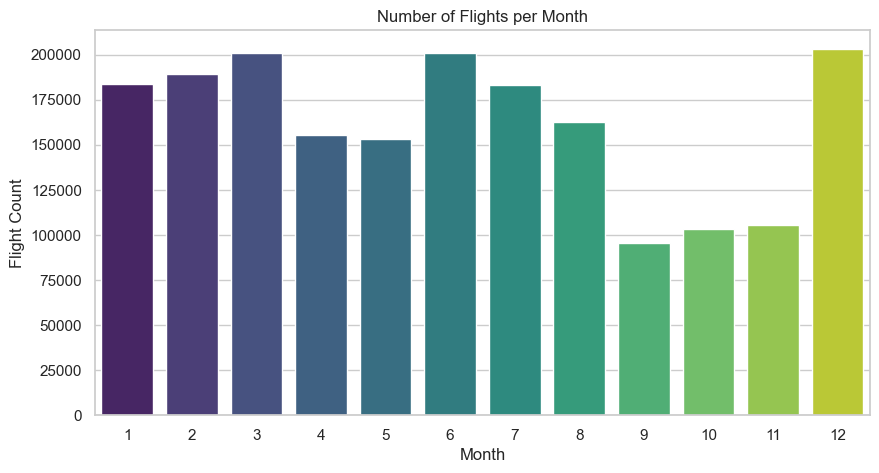

In [4]:
sns.countplot(x="month", data=df, palette="viridis")
plt.title("Number of Flights per Month")
plt.xlabel("Month")
plt.ylabel("Flight Count")
plt.show()


##Flights by Day of Week

C:\Users\HP\AppData\Local\Temp\ipykernel_4648\2418322400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="day_of_week", data=df, order=order, palette="coolwarm")


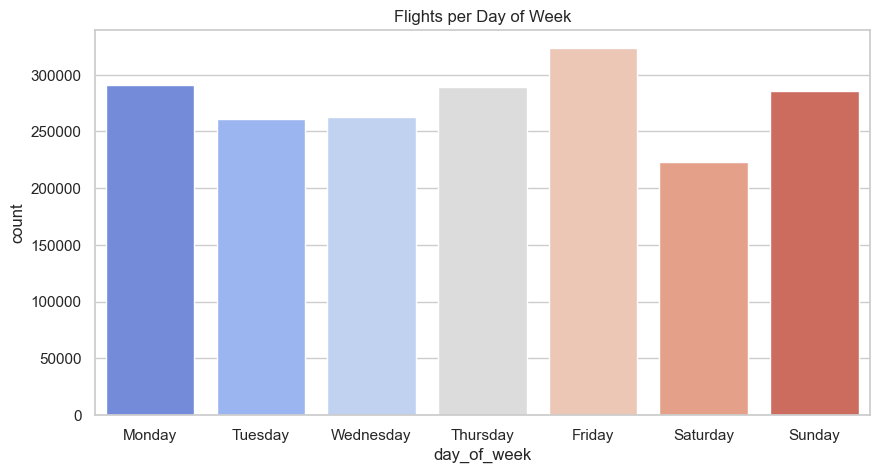

In [5]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x="day_of_week", data=df, order=order, palette="coolwarm")
plt.title("Flights per Day of Week")
plt.show()


##Flights by Hour of Departure

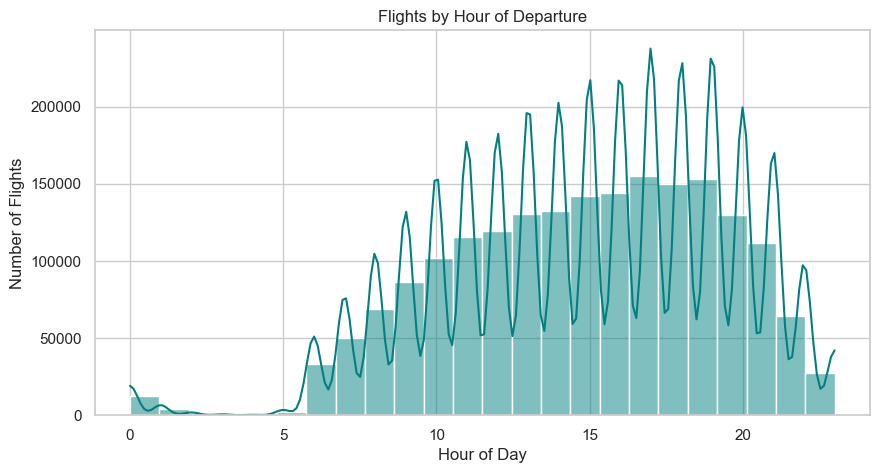

In [6]:
sns.histplot(df["dep_hour"], bins=24, kde=True, color="teal")
plt.title("Flights by Hour of Departure")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Flights")
plt.show()


##Top 10 Airlines by Flight Count

C:\Users\HP\AppData\Local\Temp\ipykernel_4648\776237190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines.values, y=top_airlines.index, palette="mako")


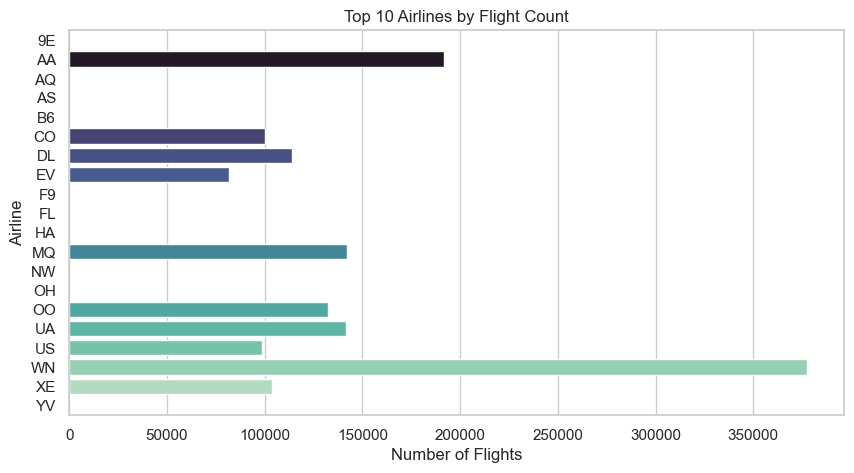

In [7]:
top_airlines = df["uniquecarrier"].value_counts().nlargest(10)
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette="mako")
plt.title("Top 10 Airlines by Flight Count")
plt.xlabel("Number of Flights")
plt.ylabel("Airline")
plt.show()


##Delay Distributions

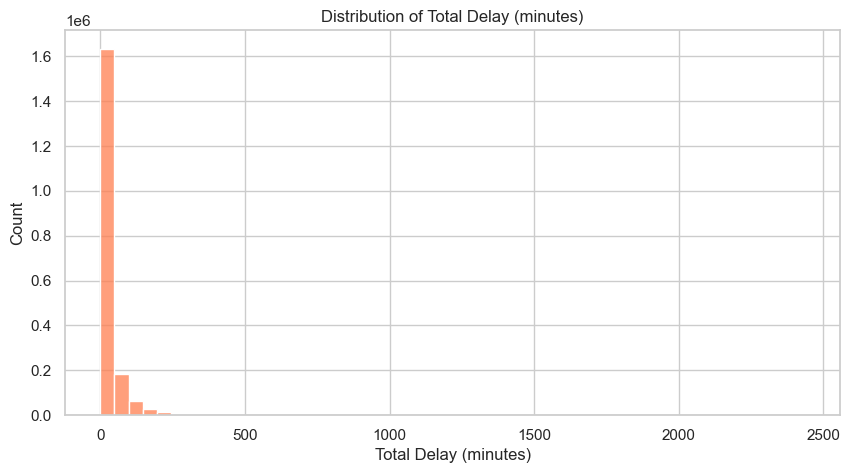

In [9]:
sns.histplot(df["total_delay_minutes"], bins=50, color="coral")
plt.title("Distribution of Total Delay (minutes)")
plt.xlabel("Total Delay (minutes)")
plt.show()


##Average Delay by Month

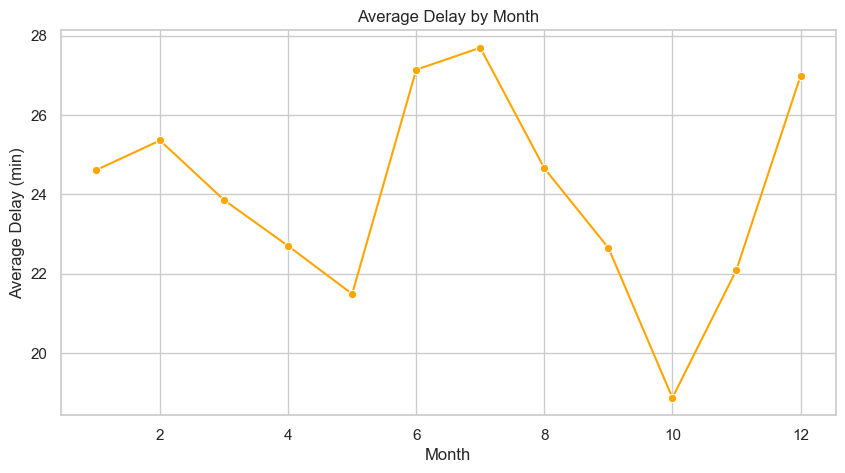

In [10]:
avg_delay_month = df.groupby("month")["total_delay_minutes"].mean().reset_index()
sns.lineplot(data=avg_delay_month, x="month", y="total_delay_minutes", marker="o", color="orange")
plt.title("Average Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (min)")
plt.show()


##Average Delay by Airline

C:\Users\HP\AppData\Local\Temp\ipykernel_4648\2108228917.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay_airline = df.groupby("uniquecarrier")["total_delay_minutes"].mean().sort_values(ascending=False).head(10)
C:\Users\HP\AppData\Local\Temp\ipykernel_4648\2108228917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delay_airline.values, y=avg_delay_airline.index, palette="flare")


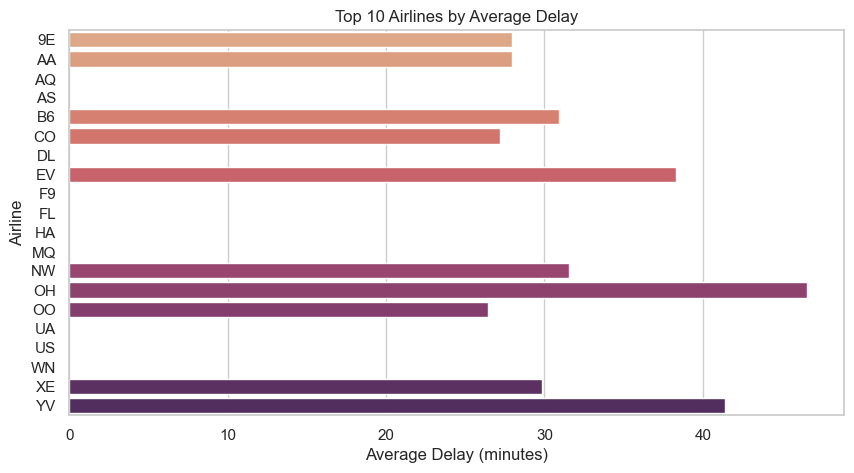

In [11]:
avg_delay_airline = df.groupby("uniquecarrier")["total_delay_minutes"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_delay_airline.values, y=avg_delay_airline.index, palette="flare")
plt.title("Top 10 Airlines by Average Delay")
plt.xlabel("Average Delay (minutes)")
plt.ylabel("Airline")
plt.show()


##Delay by Day of Week (Boxplot)

C:\Users\HP\AppData\Local\Temp\ipykernel_4648\1479054068.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day_of_week", y="total_delay_minutes", data=df, order=order, palette="Spectral")


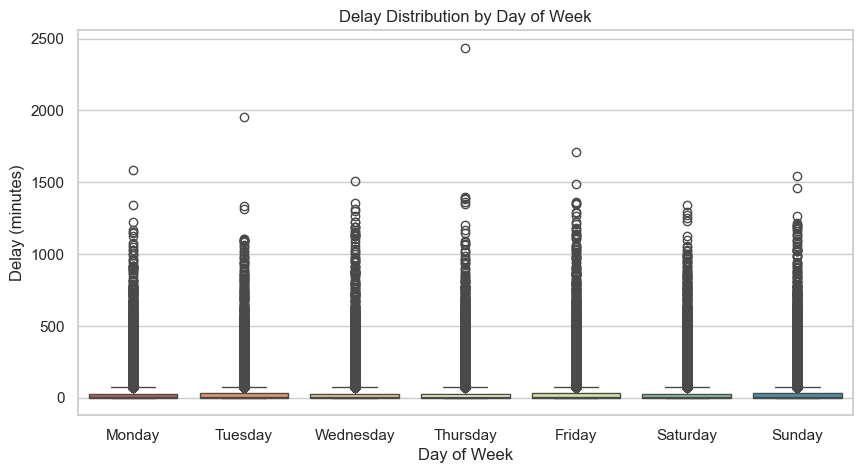

In [12]:
sns.boxplot(x="day_of_week", y="total_delay_minutes", data=df, order=order, palette="Spectral")
plt.title("Delay Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Delay (minutes)")
plt.show()


##Delay by Hour of Departure

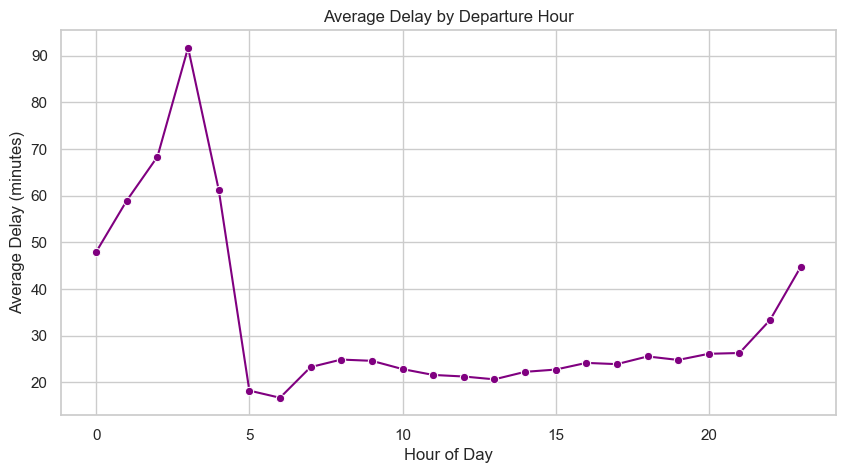

In [13]:
avg_delay_hour = df.groupby("dep_hour")["total_delay_minutes"].mean().reset_index()
sns.lineplot(x="dep_hour", y="total_delay_minutes", data=avg_delay_hour, marker="o", color="purple")
plt.title("Average Delay by Departure Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Delay (minutes)")
plt.show()


#### Correlation Analysis (Numerical Relationships)

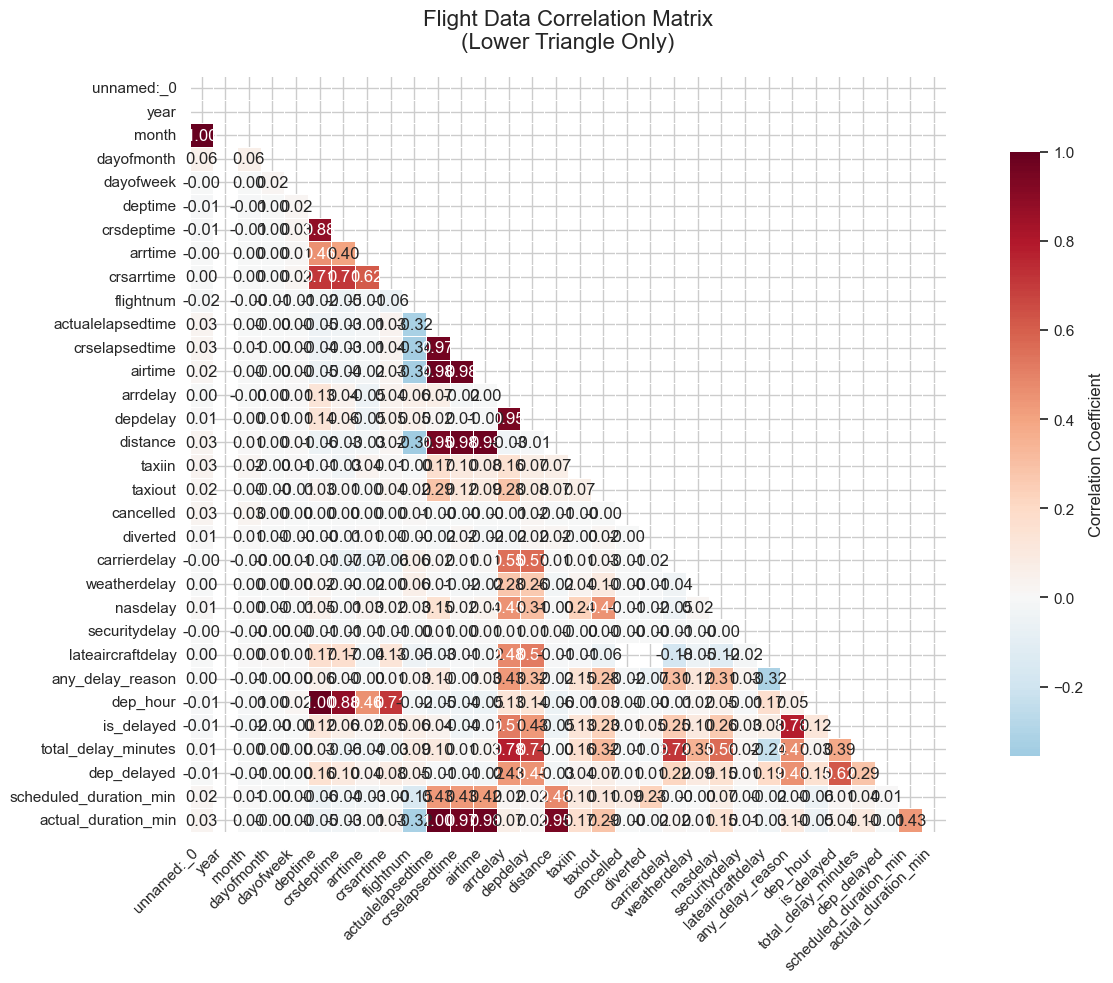

🔍 STRONGEST CORRELATIONS ANALYSIS

📈 TOP 5 STRONGEST POSITIVE CORRELATIONS:
   actualelapsedtime ↔ actual_duration_min: 1.000
   actual_duration_min ↔ actualelapsedtime: 1.000
   deptime ↔ dep_hour: 0.999
   dep_hour ↔ deptime: 0.999
   unnamed:_0 ↔ month: 0.996

📉 TOP 5 STRONGEST NEGATIVE CORRELATIONS:
   flightnum ↔ distance: -0.357
   distance ↔ flightnum: -0.357
   flightnum ↔ airtime: -0.340
   airtime ↔ flightnum: -0.340
   flightnum ↔ crselapsedtime: -0.336

⏰ DELAY-RELATED INSIGHTS:
------------------------------
Variables most correlated with Total Delay:
   arrdelay: 0.780 (📈 Positive)
   carrierdelay: 0.715 (📈 Positive)
   depdelay: 0.706 (📈 Positive)
   nasdelay: 0.562 (📈 Positive)
   any_delay_reason: 0.466 (📈 Positive)


In [18]:
# Enhanced Correlation Analysis
import numpy as np

# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a more comprehensive correlation analysis
plt.figure(figsize=(14, 10))

# Create a mask for the upper triangle to avoid redundancy
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate the heatmap with improved styling
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap="RdBu_r",  # Red-Blue diverging colormap
            fmt=".2f",
            center=0,  # Center the colormap at 0
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})

plt.title("Flight Data Correlation Matrix\n(Lower Triangle Only)", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find and display the strongest correlations (excluding self-correlations)
print("🔍 STRONGEST CORRELATIONS ANALYSIS")
print("=" * 50)

# Create a copy without diagonal elements
corr_copy = correlation_matrix.copy()
np.fill_diagonal(corr_copy.values, np.nan)

# Find strongest positive and negative correlations
correlations_flat = corr_copy.unstack().dropna()
strongest_positive = correlations_flat.nlargest(5)
strongest_negative = correlations_flat.nsmallest(5)

print("\n📈 TOP 5 STRONGEST POSITIVE CORRELATIONS:")
for (var1, var2), corr in strongest_positive.items():
    print(f"   {var1} ↔ {var2}: {corr:.3f}")

print("\n📉 TOP 5 STRONGEST NEGATIVE CORRELATIONS:")
for (var1, var2), corr in strongest_negative.items():
    print(f"   {var1} ↔ {var2}: {corr:.3f}")

# Focus on delay-related correlations
print("\n⏰ DELAY-RELATED INSIGHTS:")
print("-" * 30)
delay_correlations = correlation_matrix['total_delay_minutes'].sort_values(key=abs, ascending=False)[1:]  # Exclude self-correlation

print("Variables most correlated with Total Delay:")
for var, corr in delay_correlations.head(5).items():
    direction = "📈 Positive" if corr > 0 else "📉 Negative"
    print(f"   {var}: {corr:.3f} ({direction})")

In [17]:
summary = df.describe(include="all")
summary.to_csv("summary/EDA_summary.csv")
print("EDA summary saved successfully!")


EDA summary saved successfully!
